In [ ]:
!pip install torch transformers rouge_score evaluate datasets

In [ ]:
import requests
import torch
from PIL import Image
from transformers import *
from tqdm import tqdm
# set device to GPU if available
device = "cuda" if torch.cuda.is_available() else "cpu"

In [ ]:
# load a fine-tuned image captioning model and corresponding tokenizer and image processor
finetuned_model = VisionEncoderDecoderModel.from_pretrained("nlpconnect/vit-gpt2-image-captioning").to(device)
finetuned_tokenizer = GPT2TokenizerFast.from_pretrained("nlpconnect/vit-gpt2-image-captioning")
finetuned_image_processor = ViTImageProcessor.from_pretrained("nlpconnect/vit-gpt2-image-captioning")

In [ ]:
import urllib.parse as parse
import os

# a function to determine whether a string is a URL or not
def is_url(string):
    try:
        result = parse.urlparse(string)
        return all([result.scheme, result.netloc, result.path])
    except:
        return False
    
# a function to load an image
def load_image(image_path):
    if is_url(image_path):
        return Image.open(requests.get(image_path, stream=True).raw)
    elif os.path.exists(image_path):
        return Image.open(image_path)
        
# a function to perform inference
def get_caption(model, image_processor, tokenizer, image_path, max_length=50):
    image = load_image(image_path)
    # preprocess the image
    img = image_processor(image, return_tensors="pt").to(device)
    # generate the caption (using greedy decoding by default)
    output = model.generate(**img, max_length=max_length)
    # decode the output
    caption = tokenizer.batch_decode(output, skip_special_tokens=True)[0]
    return caption

Load

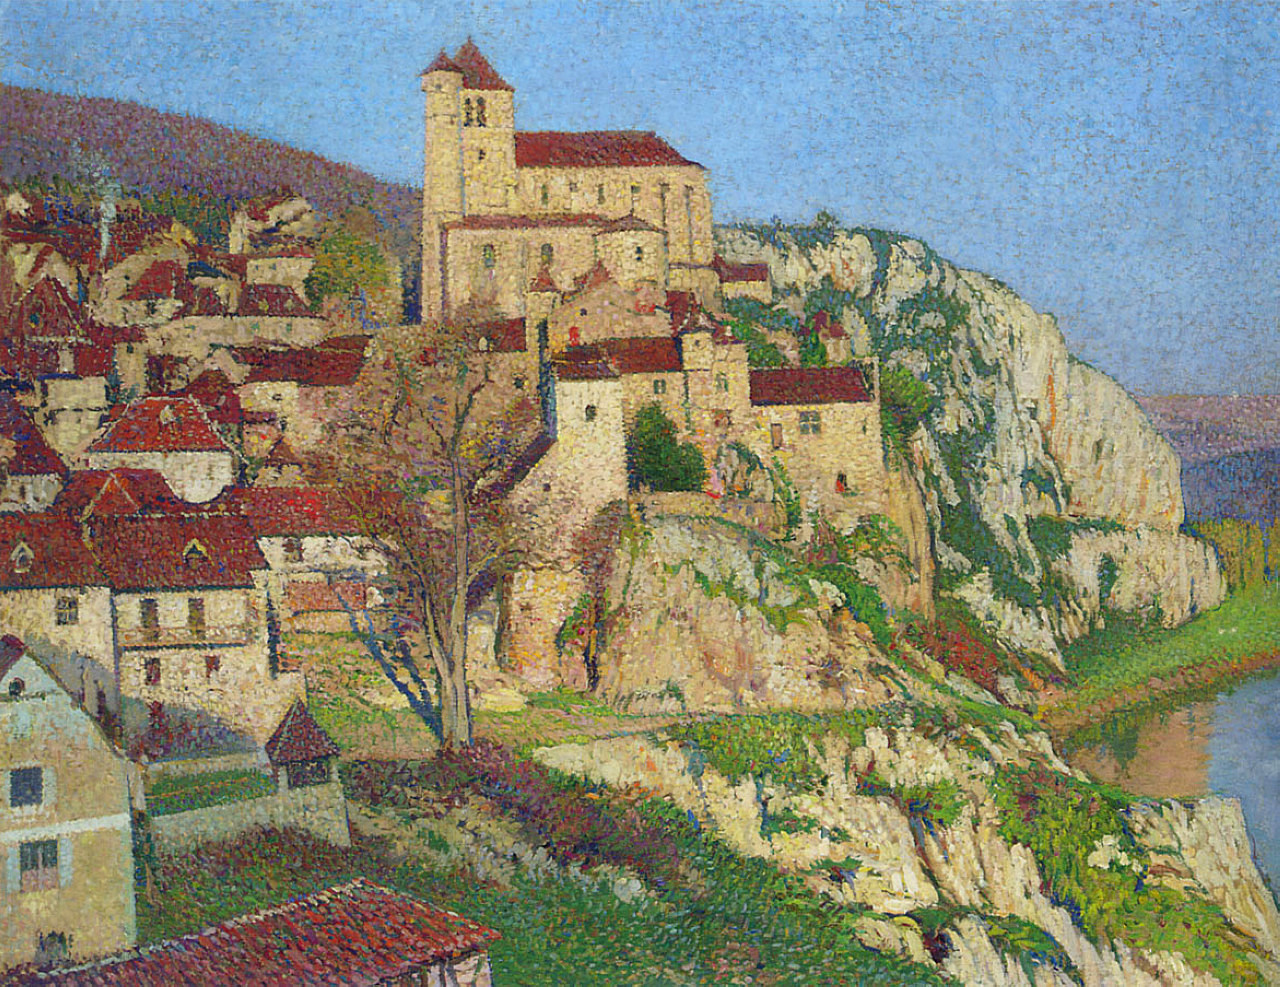

Generate config GenerationConfig {
  "_from_model_config": true,
  "bos_token_id": 50256,
  "decoder_start_token_id": 50256,
  "eos_token_id": 50256,
  "pad_token_id": 50256,
  "transformers_version": "4.28.1"
}



'a painting of a castle with a boat on the water '

In [ ]:
# load displayer
from IPython.display import display
url = "paint.jpg"

# display the image
display(load_image(url))
# get the caption
get_caption(finetuned_model, finetuned_image_processor, finetuned_tokenizer, url)